**REGRESSION - LINEAR REGRESSION**

This model performs linear regression on the diabetes dataset, splitting it into training and testing sets. It scales the features using MinMaxScaler, fits a linear regression model to the training data, and evaluates its performance using mean squared error (MSE) and R-squared (R2) score metrics. Finally, it visualizes the relationship between actual and predicted values using a scatter plot.

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import math

diabetes = load_diabetes(as_frame=True)

display(diabetes.frame)

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.1)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

linmodel = LinearRegression().fit(X_train, y_train)


2893.1163149756667
0.37001406118970515


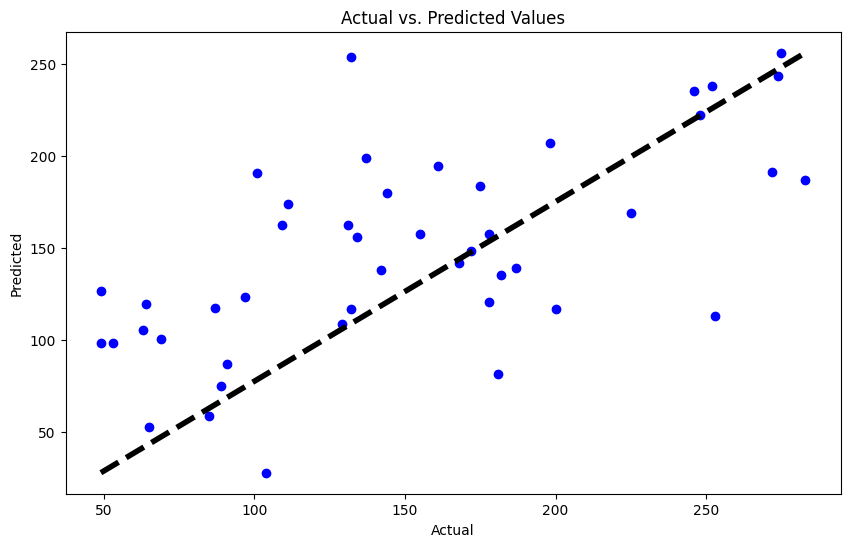

In [ ]:
y_pred = linmodel.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(mse)
print(r2)


plt.figure(figsize=(10, 6))

# Plotting actual values
plt.scatter(y_test, y_pred, color='blue')

# Plotting the identity line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

**REGRESSION - MULTILAYER PERCEPTRON:**

This model implements a simple neural network with two hidden layers using “vanilla” Python. It trains the neural network on the diabetes dataset using stochastic gradient descent (SGD) and prints the training and testing loss every 100 epochs. Finally, it visualizes the learning curve (loss vs. epochs) using matplotlib.

Epoch 100/1000, Train Loss: 4883.0312, Test Loss: 4626.8576
Epoch 200/1000, Train Loss: 6278.0454, Test Loss: 6288.9057
Epoch 300/1000, Train Loss: 5103.1795, Test Loss: 5093.7425
Epoch 400/1000, Train Loss: 4659.1713, Test Loss: 4672.9901
Epoch 500/1000, Train Loss: 4306.6347, Test Loss: 4357.0134
Epoch 600/1000, Train Loss: 4056.7713, Test Loss: 4144.8964
Epoch 700/1000, Train Loss: 3878.5694, Test Loss: 3999.0479
Epoch 800/1000, Train Loss: 3763.5704, Test Loss: 3912.5599
Epoch 900/1000, Train Loss: 3637.3537, Test Loss: 3810.5839
Epoch 1000/1000, Train Loss: 3660.9646, Test Loss: 3828.7595
Training Losses:
[29179.274568610213, 27352.83492189825, 19728.089627009405, 6066.900708283646, 6171.029277826968, 6591.217097222559, 8532.340385028632, 11563.605054672169, 24297.934224959543, 10852.686575526877, 12045.102116376573, 24898.376471888896, 13482.245962001069, 9878.16122719672, 19981.51125259044, 5942.94955775811, 6235.927650019345, 7537.02469691542, 9866.059260920101, 19992.044967613

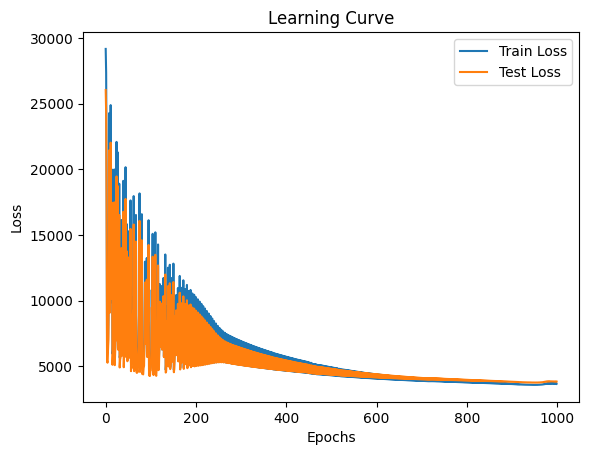

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import math

diabetes = load_diabetes(as_frame=True)
X = diabetes.data[['bmi', 'bp']]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def relu(x):
    return max(0, x)


def relu_derivative(x):
    return 1 if x > 0 else 0

def initialize_parameters(input_size, hidden_size):
    W1 = [[0.1, 0.2], [0.3, 0.4]]
    b1 = [0.5, 0.6]
    W2 = [[0.7], [0.8]]
    b2 = [0.9]
    return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

def forward_propagation(X, parameters):
    m = len(X)
    Z1 = [[sum(X[i][j] * parameters['W1'][j][k] for j in range(len(X[0]))) + parameters['b1'][k] for k in range(len(parameters['W1'][0]))] for i in range(m)]
    A1 = [[relu(z) for z in z_row] for z_row in Z1]
    Z2 = [[sum(A1[i][j] * parameters['W2'][j][k] for j in range(len(A1[0]))) + parameters['b2'][k] for k in range(len(parameters['W2'][0]))] for i in range(m)]
    A2 = [[relu(z) for z in z_row] for z_row in Z2]
    return {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}

def backward_propagation(X, y, parameters, cache, learning_rate):
    m = len(X)
    dZ2 = [[cache['A2'][i][j] - y[i][j] for j in range(len(y[0]))] for i in range(m)]
    dW2 = [[sum(cache['A1'][i][j] * dZ2[i][k] for i in range(len(cache['A1']))) / m for k in range(len(dZ2[0]))] for j in range(len(cache['A1'][0]))]
    db2 = [sum(dZ2[i][k] for i in range(m)) / m for k in range(len(dZ2[0]))]
    dZ1 = [[sum(dZ2[i][k] * parameters['W2'][j][k] * relu_derivative(cache['Z1'][i][j]) for k in range(len(dZ2[0]))) for j in range(len(cache['Z1'][0]))] for i in range(m)]
    dW1 = [[sum(X[i][l] * dZ1[i][j] for i in range(len(X))) / m for j in range(len(dZ1[0]))] for l in range(len(X[0]))]
    db1 = [sum(dZ1[i][j] for i in range(m)) / m for j in range(len(dZ1[0]))]
    # Update parameters
    parameters['W2'] = [[parameters['W2'][j][k] - learning_rate * dW2[j][k] for k in range(len(dW2[0]))] for j in range(len(dW2))]
    parameters['b2'] = [parameters['b2'][k] - learning_rate * db2[k] for k in range(len(db2))]
    parameters['W1'] = [[parameters['W1'][j][k] - learning_rate * dW1[j][k] for k in range(len(dW1[0]))] for j in range(len(dW1))]
    parameters['b1'] = [parameters['b1'][k] - learning_rate * db1[k] for k in range(len(db1))]
    return parameters

def calculate_loss(A2, y):
    m = len(y)
    loss = sum((A2[i][0] - y[i][0]) ** 2 for i in range(m)) / m
    return loss

def train_neural_network(X_train, y_train, X_test, y_test, hidden_size=2, epochs=1000, learning_rate=0.01):
    input_size = len(X_train[0])
    parameters = initialize_parameters(input_size, hidden_size)
    train_losses = []
    test_losses = []
    for epoch in range(epochs):

        train_cache = forward_propagation(X_train, parameters)
        test_cache = forward_propagation(X_test, parameters)

        train_loss = calculate_loss(train_cache['A2'], y_train)
        test_loss = calculate_loss(test_cache['A2'], y_test)
        train_losses.append(train_loss)
        test_losses.append(test_loss)

        parameters = backward_propagation(X_train, y_train, parameters, train_cache, learning_rate)
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
    return parameters, train_losses, test_losses


X_train_list = X_train.values.tolist()
y_train_list = [[y] for y in y_train.tolist()]
X_test_list = X_test.values.tolist()
y_test_list = [[y] for y in y_test.tolist()]
parameters, train_losses, test_losses = train_neural_network(X_train_list, y_train_list, X_test_list, y_test_list, hidden_size=2, epochs=1000, learning_rate=0.01)

print("Training Losses:")
print(train_losses)
print("\nTesting Losses:")
print(test_losses)

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()



  **CLASSIFICATION**

In [ ]:
!pip install ucimlrepo

In [ ]:

from ucimlrepo import fetch_ucirepo
import keras
import pandas as pd


ionosphere = fetch_ucirepo(id=52)

df = ionosphere.data.original


df.drop(columns=['Attribute2'], axis=1, inplace=True)

df_n_target = df.drop('Class',axis=1)

df['Class'].replace({'g': 1, 'b': 0}, inplace=True)
label_y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(df_n_target, label_y, test_size=0.1)

model = keras.Sequential()

model.add(keras.layers.Dense(24, input_shape=(X_train.shape[1],),activation='relu'))
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(keras.optimizers.SGD(learning_rate=0.01), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=16)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_accuracy)




Epoch 1/30
20/20 [==============================] - 2s 32ms/step - loss: 0.6056 - accuracy: 0.6698 - val_loss: 0.6021 - val_accuracy: 0.6389
Epoch 2/30
20/20 [==============================] - 0s 7ms/step - loss: 0.5868 - accuracy: 0.6794 - val_loss: 0.5829 - val_accuracy: 0.6389
Epoch 3/30
20/20 [==============================] - 0s 8ms/step - loss: 0.5703 - accuracy: 0.6857 - val_loss: 0.5659 - val_accuracy: 0.6389
Epoch 4/30
20/20 [==============================] - 0s 12ms/step - loss: 0.5545 - accuracy: 0.7048 - val_loss: 0.5504 - val_accuracy: 0.6667
Epoch 5/30
20/20 [==============================] - 0s 6ms/step - loss: 0.5408 - accuracy: 0.7143 - val_loss: 0.5355 - val_accuracy: 0.6944
Epoch 6/30
20/20 [==============================] - 0s 7ms/step - loss: 0.5267 - accuracy: 0.7302 - val_loss: 0.5222 - val_accuracy: 0.7222
Epoch 7/30
20/20 [==============================] - 0s 8ms/step - loss: 0.5140 - accuracy: 0.7429 - val_loss: 0.5097 - val_accuracy: 0.7222
Epoch 8/30
20/20 [

**CLASSIFICATION WITH BATCH NORMALIZATION, WE GOT 100% ACCURACY 1 TIME, the test accuracy is consistently between 88-100%. The loss value gets lower alot faster**

In [ ]:

from ucimlrepo import fetch_ucirepo
import keras
from keras.layers import Dense, BatchNormalization
import pandas as pd


ionosphere = fetch_ucirepo(id=52)

df = ionosphere.data.original


df.drop(columns=['Attribute2'], axis=1, inplace=True)

df_n_target = df.drop('Class',axis=1)

df['Class'].replace({'g': 1, 'b': 0}, inplace=True)
label_y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(df_n_target, label_y, test_size=0.1)

model = keras.Sequential()

model.add(keras.layers.Dense(24, input_shape=(X_train.shape[1],),activation='relu'))
model.add(BatchNormalization())
model.add(keras.layers.Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(keras.optimizers.SGD(learning_rate=0.01), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=16)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_accuracy)




Epoch 1/30
20/20 [==============================] - 3s 29ms/step - loss: 0.7952 - accuracy: 0.6317 - val_loss: 0.7055 - val_accuracy: 0.4167
Epoch 2/30
20/20 [==============================] - 0s 8ms/step - loss: 0.5653 - accuracy: 0.7143 - val_loss: 0.6058 - val_accuracy: 0.8333
Epoch 3/30
20/20 [==============================] - 0s 6ms/step - loss: 0.4429 - accuracy: 0.7873 - val_loss: 0.5492 - val_accuracy: 0.8611
Epoch 4/30
20/20 [==============================] - 0s 6ms/step - loss: 0.3683 - accuracy: 0.8571 - val_loss: 0.5115 - val_accuracy: 0.8333
Epoch 5/30
20/20 [==============================] - 0s 9ms/step - loss: 0.3447 - accuracy: 0.8635 - val_loss: 0.4826 - val_accuracy: 0.8056
Epoch 6/30
20/20 [==============================] - 0s 6ms/step - loss: 0.2823 - accuracy: 0.9206 - val_loss: 0.4641 - val_accuracy: 0.8333
Epoch 7/30
20/20 [==============================] - 0s 6ms/step - loss: 0.2800 - accuracy: 0.8825 - val_loss: 0.4402 - val_accuracy: 0.8611
Epoch 8/30
20/20 [=

**Adding Dropout made it worse, It was not as good as the model above.**

In [ ]:

from ucimlrepo import fetch_ucirepo
import keras
from keras.layers import Dense, BatchNormalization, Dropout
import pandas as pd


ionosphere = fetch_ucirepo(id=52)

df = ionosphere.data.original


df.drop(columns=['Attribute2'], axis=1, inplace=True)

df_n_target = df.drop('Class',axis=1)

df['Class'].replace({'g': 1, 'b': 0}, inplace=True)
label_y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(df_n_target, label_y, test_size=0.1)

model = keras.Sequential()

model.add(keras.layers.Dense(24, input_shape=(X_train.shape[1],),activation='relu'))
model.add(BatchNormalization())
model.add(keras.layers.Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(keras.optimizers.SGD(learning_rate=0.01), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=12)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_accuracy)




Epoch 1/30
27/27 [==============================] - 3s 23ms/step - loss: 0.8355 - accuracy: 0.5524 - val_loss: 0.5819 - val_accuracy: 0.6944
Epoch 2/30
27/27 [==============================] - 0s 8ms/step - loss: 0.6321 - accuracy: 0.6889 - val_loss: 0.5567 - val_accuracy: 0.6944
Epoch 3/30
27/27 [==============================] - 0s 9ms/step - loss: 0.5186 - accuracy: 0.7429 - val_loss: 0.5205 - val_accuracy: 0.6944
Epoch 4/30
27/27 [==============================] - 0s 14ms/step - loss: 0.5271 - accuracy: 0.7524 - val_loss: 0.4866 - val_accuracy: 0.7778
Epoch 5/30
27/27 [==============================] - 0s 8ms/step - loss: 0.4707 - accuracy: 0.7810 - val_loss: 0.4476 - val_accuracy: 0.7778
Epoch 6/30
27/27 [==============================] - 0s 5ms/step - loss: 0.4365 - accuracy: 0.8032 - val_loss: 0.4134 - val_accuracy: 0.8611
Epoch 7/30
27/27 [==============================] - 0s 8ms/step - loss: 0.4914 - accuracy: 0.7810 - val_loss: 0.3908 - val_accuracy: 0.8889
Epoch 8/30
27/27 [

**Added EarlyStoppage, There are times early stoppage stops the epochs because its no longer improving the model,therefore possibility preventing overfit**

In [ ]:
from ucimlrepo import fetch_ucirepo
import keras
from keras.layers import Dense, BatchNormalization, Dropout
import pandas as pd
from keras.callbacks import EarlyStopping

ionosphere = fetch_ucirepo(id=52)

df = ionosphere.data.original
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor the model's validation loss
                               min_delta=0.01,    # Minimum change to qualify as an improvement
                               patience=5,        # Stop if no improvement in the last 10 epochs
                               verbose=1,          # Print messages when stopping
                               mode='min',         # Minimize the monitored quantity
                               restore_best_weights=True)

df.drop(columns=['Attribute2'], axis=1, inplace=True)

df_n_target = df.drop('Class',axis=1)

df['Class'].replace({'g': 1, 'b': 0}, inplace=True)
label_y = df['Class']

weight_decay = 0.01

X_train, X_test, y_train, y_test = train_test_split(df_n_target, label_y, test_size=0.1)

model = keras.Sequential()

model.add(keras.layers.Dense(24, input_shape=(X_train.shape[1],),activation='relu'))
model.add(BatchNormalization())

model.add(keras.layers.Dense(16, input_shape=(X_train.shape[1],),activation='relu'))
model.add(BatchNormalization())
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(keras.optimizers.SGD(learning_rate=0.01), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16,callbacks=[early_stopping])
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_accuracy)



Epoch 1/50
20/20 [==============================] - 1s 15ms/step - loss: 0.7327 - accuracy: 0.5556 - val_loss: 0.6071 - val_accuracy: 0.8056
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5423 - accuracy: 0.7651 - val_loss: 0.5676 - val_accuracy: 0.8333
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4600 - accuracy: 0.8222 - val_loss: 0.5402 - val_accuracy: 0.8611
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4375 - accuracy: 0.8349 - val_loss: 0.5146 - val_accuracy: 0.8333
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.3771 - accuracy: 0.8794 - val_loss: 0.4958 - val_accuracy: 0.8333
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.3669 - accuracy: 0.8984 - val_loss: 0.4805 - val_accuracy: 0.8333
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3380 - accuracy: 0.8952 - val_loss: 0.4647 - val_accuracy: 0.8333
Epoch 8/50
20/20 [=

EVERYONE CONTRIBUTED EQUALLY ON THIS PROJECT